In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the data
df = pd.read_excel("./data/FINAL_DATASET.xlsx")

for name in df.columns:
    newname = name
    # remove alla characted within two []
    while "[" in newname:
        start = newname.find("[")
        end = newname.find("]")
        newname = newname[:start] + newname[end+1:]
    # remove end spaces and beginning spaces
    newname = newname.strip()
    # remove alla mathematical oipreators caharacters and spaces
    newname = newname.replace(" ", "_")
    newname = newname.replace(">", "gt")
    newname = newname.replace("<", "lt")
    newname = newname.replace("=", "eq")
    newname = newname.replace("+", "plus")
    newname = newname.replace("-", "minus")
    newname = newname.replace("*", "times")
    newname = newname.replace("/", "div")
    # rename columns in the dataframe
    df.rename(columns={name: newname}, inplace=True)

In [2]:
labelname  = "d33"
materialfeatures = ['octahedra_volume_min', 'octahedra_volume_max', 'octahedra_volume_avg',
       'octahedra_meanangle_axis_min', 'octahedra_meanangle_axis_max',
       'octahedra_meanangle_axis_avg', 'tilt_BOB_ip_min', 'tilt_BOB_ip_max',
       'tilt_BOB_ip_avg', 'tilt_BOB_oop_min', 'tilt_BOB_oop_max',
       'tilt_BOB_oop_avg', 'spageGroup_no', 'lattice_a', 'lattice_b',
       'lattice_c', 'lattice_alfa', 'lattice_beta', 'lattice_gamma',
       'volume_uc', 'volume_uc_per_atom', 'volume_ratio_ucVSoctahedra',
       'tolerance_factor', 'ratio_outVSinplaneAVG', 'ratio_outVSinplanemin',
       'ratio_outVSinplanemax', 'bond_lengthAA_min', 'bond_lengthAA_max',
       'bond_lengthAA_avg', 'bond_lengthAB_min', 'bond_lengthAB_max',
       'bond_lengthAB_avg', 'bond_lengthAO_min', 'bond_lengthAO_max',
       'bond_lengthAO_avg', 'bond_lengthBO_min', 'bond_lengthBO_max',
       'bond_lengthBO_avg', 'bond_lengthBB_min', 'bond_lengthBB_max',
       'bond_lengthBB_avg', 'is_magnetic', #'is_metallic', 'is_perovskite', 
       #'P_0_z', 
       'P_0_z_muCdivcm2',]
atomicfeatures = ['A_Z', 'A_group', 'A_valence',
       'A_vecdivZ', 'A_n_d', 'A_atomic_volume_pymatgen', 'A_Rdce', 'A_Rdve',
       'A_rs_max', 'A_rd_max', 'A_IE_ionization_energy',
       'A_EA_electron_affinity', 'A_Mulliken', 'A_Pauling',
       'A_MartynovminusBatsanov', 'A_atomic_radius_rahm', 'A_vdw_radius_uff',
       'A_ionic_radius', 'B_Z', 'B_group', 'B_valence', 'B_vecdivZ', 'B_n_d',
       'B_atomic_volume_pymatgen', 'B_Rdce', 'B_Rdve', 'B_rs_max', 'B_rd_max',
       'B_IE_ionization_energy', 'B_EA_electron_affinity', 'B_Mulliken',
       'B_Pauling', 'B_MartynovminusBatsanov', 'B_atomic_radius_rahm',
       'B_vdw_radius_uff', 'B_residual_d', 'B_ionic_radius']

Y = df[labelname]
X = df[materialfeatures + atomicfeatures]
X_mat = df[materialfeatures]
X_atm = df[atomicfeatures]

In [3]:
CORRCUT = 0.95
# compute and plot correlation matrix
corr = X.corr()
# remove highly correlated values
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] >CORRCUT)]
print("Dropping features: ", to_drop)
# Drop features
X = X.drop(X[to_drop], axis=1)

corr_mat = X_mat.corr()
# remove highly correlated values
# Select upper triangle of correlation matrix
upper = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
print("Dropping features: ", to_drop)
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > CORRCUT)]
# Drop features
X_mat = X_mat.drop(X_mat[to_drop], axis=1)

corr_atm = X_atm.corr()
# remove highly correlated values
# Select upper triangle of correlation matrix
upper = corr_atm.where(np.triu(np.ones(corr_atm.shape), k=1).astype(np.bool))
print("Dropping features: ", to_drop)
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > CORRCUT)]
# Drop features
X_atm = X_atm.drop(X_atm[to_drop], axis=1)

Dropping features:  ['octahedra_volume_max', 'octahedra_volume_avg', 'octahedra_meanangle_axis_avg', 'tilt_BOB_ip_avg', 'tilt_BOB_oop_max', 'tilt_BOB_oop_avg', 'lattice_beta', 'lattice_gamma', 'volume_ratio_ucVSoctahedra', 'bond_lengthAA_avg', 'bond_lengthAB_avg', 'bond_lengthBO_avg', 'bond_lengthBB_max', 'bond_lengthBB_avg', 'A_n_d']
Dropping features:  ['octahedra_volume_max', 'octahedra_volume_avg', 'octahedra_meanangle_axis_avg', 'tilt_BOB_ip_avg', 'tilt_BOB_oop_max', 'tilt_BOB_oop_avg', 'lattice_beta', 'lattice_gamma', 'volume_ratio_ucVSoctahedra', 'bond_lengthAA_avg', 'bond_lengthAB_avg', 'bond_lengthBO_avg', 'bond_lengthBB_max', 'bond_lengthBB_avg', 'A_n_d']
Dropping features:  ['octahedra_volume_max', 'octahedra_volume_avg', 'octahedra_meanangle_axis_avg', 'tilt_BOB_ip_avg', 'tilt_BOB_oop_max', 'tilt_BOB_oop_avg', 'lattice_beta', 'lattice_gamma', 'volume_ratio_ucVSoctahedra', 'bond_lengthAA_avg', 'bond_lengthAB_avg', 'bond_lengthBO_avg', 'bond_lengthBB_max', 'bond_lengthBB_avg'

/tmp/ipykernel_3999728/1593022793.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
/tmp/ipykernel_3999728/1593022793.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
/tmp/ipykernel_3999728/159302

In [4]:
from sklearn.preprocessing import StandardScaler

X_df = X 
X_mat_df = X_mat
X_atm_df = X_atm
X = StandardScaler().fit_transform(X)
X_mat = StandardScaler().fit_transform(X_mat)
X_atm = StandardScaler().fit_transform(X_atm)

Number of components for 80% explained variance:  10  of  65
Number of components for 90% explained variance:  16  of  65


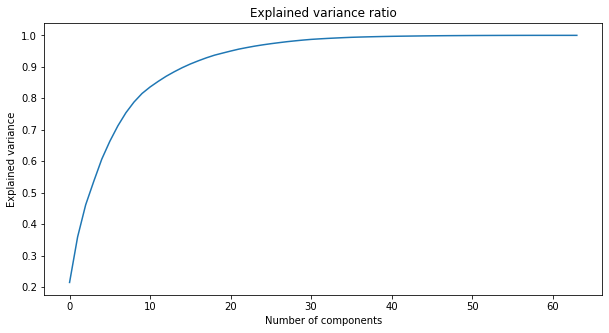

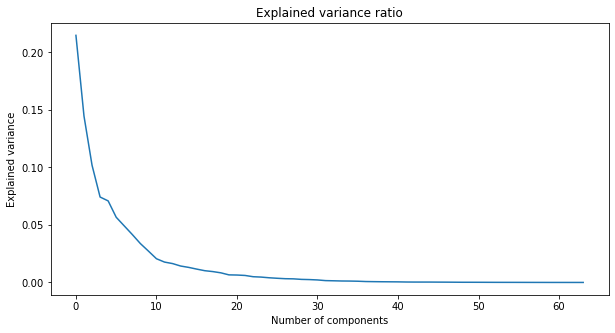

In [5]:
from sklearn.decomposition import PCA

sumofvar = []
ratioofvar = []

first80 = False
firtt90 = False
for nc in range(1, X.shape[1]):
    pca = PCA(n_components=nc)
    pcs = pca.fit_transform(X)
    sumofvar.append(sum(pca.explained_variance_ratio_))
    #print("Explained variance ratio for ", nc, " components: ", pca.explained_variance_ratio_)
    ratioofvar.append(pca.explained_variance_ratio_[-1])
    if sumofvar[-1] > 0.8 and not first80:
        print("Number of components for 80% explained variance: ", nc, " of ", X.shape[1])
        first80 = True
    if sumofvar[-1] > 0.9 and not firtt90:
        print("Number of components for 90% explained variance: ", nc, " of ", X.shape[1])
        firtt90 = True
    #print("Explained variance ratio for ", nc, " components: ", pca.explained_variance_ratio_)
    #print("Explained variance for ", nc, " components: ", pca.explained_variance_)
    #print("Sum of explained variance for ", nc, " components: ", sum(pca.explained_variance_ratio_))

# plot the explained variance ratio
# increase the size of the plot
plt.figure(figsize=(10, 5))
plt.plot(sumofvar)
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.title("Explained variance ratio")
plt.show()

# plot the explained variance ratio
plt.figure(figsize=(10, 5))
plt.plot(ratioofvar)
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.title("Explained variance ratio")
plt.show()


In [6]:
# loeading plot for the first 16 components
pca = PCA(n_components=16)
pcs = pca.fit_transform(X)
loading = pca.components_
loading = np.transpose(loading)
print("Loading shape: ", loading.shape)

usecomps = 4

for ncomp in range(usecomps):
    print("Explained variance for component ", ncomp, \
          ": ", pca.explained_variance_ratio_[ncomp])
    #print(loading[:, ncomp])
loading = pd.DataFrame(loading, columns=["PC"+str(i) for i in range(1, 17)])
loading["Feature"] = X_df.columns
loading = loading.set_index("Feature")
loading = loading.abs()
loading = loading.sort_values(by="PC1", ascending=False)

#loading.plot.bar(stacked=True, figsize=(20, 10))
#plt.show()

# print the most important features for the first 16 components
for ncomp in range(usecomps):
    print("Most important features for component ", ncomp+1)
    print(loading["PC"+str(ncomp+1)].head(10))
    print("\n\n")


Loading shape:  (65, 16)
Explained variance for component  0 :  0.2148728426597974
Explained variance for component  1 :  0.14467679689980473
Explained variance for component  2 :  0.10192190752282074
Explained variance for component  3 :  0.0742785804337998
Most important features for component  1
Feature
volume_uc_per_atom          0.256946
octahedra_volume_min        0.250871
B_ionic_radius              0.248628
B_atomic_radius_rahm        0.238796
bond_lengthAA_max           0.232847
bond_lengthBB_min           0.231712
B_atomic_volume_pymatgen    0.228991
bond_lengthBO_min           0.216838
B_rs_max                    0.209168
bond_lengthAB_max           0.206265
Name: PC1, dtype: float64



Most important features for component  2
Feature
volume_uc_per_atom          0.013306
octahedra_volume_min        0.008778
B_ionic_radius              0.006397
B_atomic_radius_rahm        0.002848
bond_lengthAA_max           0.023422
bond_lengthBB_min           0.046660
B_atomic_volume_pymatg

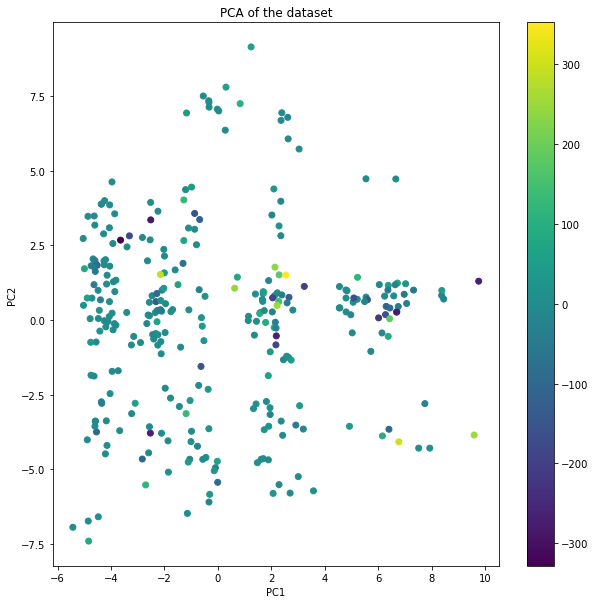

In [7]:
# plot a scatterplot of the first two components
pca = PCA(n_components=16)
pcs = pca.fit_transform(X)
# increase the size of the figure 
plt.figure(figsize=(10, 10))
plt.scatter(pcs[:, 0], pcs[:, 1], c=Y, cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of the dataset")
plt.colorbar()
plt.show()


min label:  -328.1263
max label:  352.2745
Number of values greater than 0:  156
Number of values lower than 0:  143
Number of values between 0 and 1:  68
Number of values between -1 and 0:  58


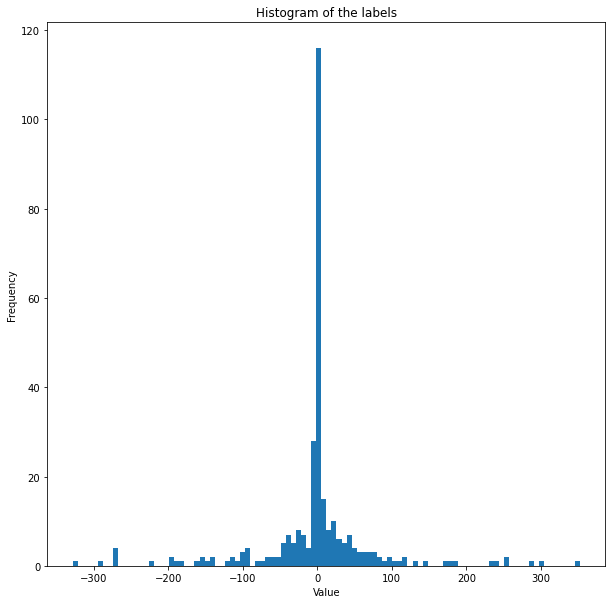

In [8]:
# add a histogram of the labels

cut = 5

print("min label: ", min(Y))
print("max label: ", max(Y))
print("Number of values greater than 0: ", len(Y[Y>0]))
print("Number of values lower than 0: ", len(Y[Y<0]))
print("Number of values between 0 and 1: ", len(Y[(Y>0) & (Y<cut)]))
print("Number of values between -1 and 0: ", len(Y[(Y<0) & (Y>-cut)]))

plt.figure(figsize=(10, 10))
plt.hist(Y, bins=100)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of the labels")
plt.show()


Number of positive values:  156
Number of negative values:  148


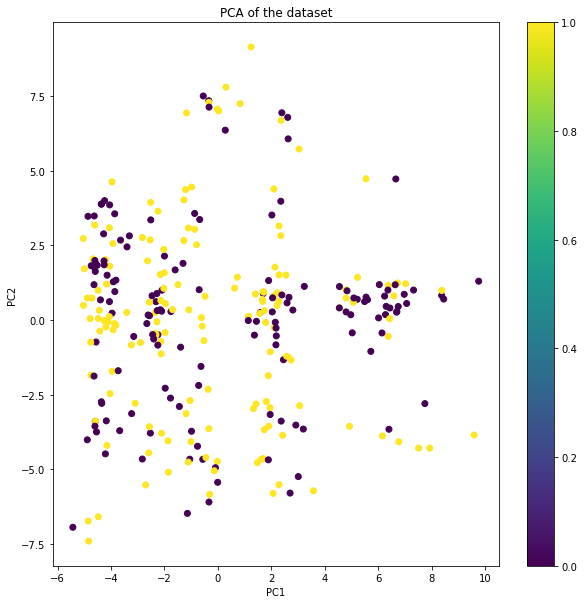

In [9]:
Y = Y.apply(lambda x: 1 if x>0 else 0)
print("Number of positive values: ", len(Y[Y==1])) 
print("Number of negative values: ", len(Y[Y==0]))
# scatter plot of the first two components with the labels
plt.figure(figsize=(10, 10))
plt.scatter(pcs[:, 0], pcs[:, 1], c=Y, cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of the dataset")
plt.colorbar()
plt.show()

In [10]:
#build a classification model using RF and PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train_mat, X_test_mat, Y_train_mat, Y_test_mat = train_test_split(X_mat, Y, test_size=0.2, random_state=42)
X_train_atm, X_test_atm, Y_train_atm, Y_test_atm = train_test_split(X_atm, Y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
print("Accuracy score for RF and PCA: ", accuracy_score(Y_test, Y_pred))

rf.fit(X_train_mat, Y_train_mat)
Y_pred = rf.predict(X_test_mat)
print("Accuracy score for RF and PCA and material features: ", accuracy_score(Y_test_mat, Y_pred))


Accuracy score for RF and PCA:  0.5737704918032787
Accuracy score for RF and PCA and material features:  0.5573770491803278
